## Victorian Road Crash Statistics and Analysis

Road statistics are well reported, but are there trends and relationships around preventative measures such as speed limit restrictions, road upgrades and road safety cameras.  We will be asking which one is the most effective at preventing incidents and what type of incidents.  

We will be diving into the data to see if our hypothesis that road upgrades are likely to be the most effective.

Key questions to be considered are:
* Is there a correlation between the number and type of road incidents and the speed limit?  Eg - Fatalities / Serious injury / Minor or no injury as classified by VicRoads.
* Does local government spending improve road conditions to prevent incidents? 
* Does the overall demographics (age / average income / gender) of local government areas have an impact on the number of incidents?
* Do speed camera locations actually decrease crash numbers within a radius of 1km from the incidents v those outside 1 km of the speed camera?


In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)


In [8]:
#Import the inital CSV
LGA_merged = pd.read_csv("lgamerged.csv")
LGA_merged.head()

,LGA,LGA Code,Departmental Region,City_Regional,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,Median household income (rank),Median house price,Median house price (rank),Journeys to work which are by car,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol,male,female,old_driver,young_driver,crash_per_person
0,ALPINE,20110,Hume,Regional,987,35,0.238,33,0.448,21,829,67,265000,50,0.439,77,0.083,35,0.561,6,0.193,10,1.0,78,12335,227,437,281,4,93,184,156,6.0,274,147,19,27,0.018403
1,ARARAT,20260,Grampians,Regional,951,11,0.455,8,0.433,30,844,64,193000,68,0.687,38,0.000,0,0.482,31,0.144,45,11.5,4,11599,150,344,221,8,71,142,123,5.0,207,132,13,35,0.012932
2,BALLARAT,20570,Grampians,Regional,981,29,0.315,23,0.417,39,988,44,294000,48,0.738,15,0.047,47,0.537,15,0.123,60,5.5,31,101689,1134,2918,1531,20,316,1195,1387,56.0,1412,1345,101,406,0.011152
3,BANYULE,20660,Northern Metropolitan,Metro,1047,67,0.083,60,0.369,68,1394,12,620000,17,0.641,55,0.206,5,0.407,64,0.167,31,3.7,54,121869,909,2224,1127,10,247,870,1097,18.0,1158,973,81,289,0.007459
4,BASS COAST,20740,Gippsland,Regional,978,27,0.216,36,0.438,26,855,61,340000,38,0.714,25,0.068,40,0.452,44,0.177,20,7.1,17,32806,340,878,485,11,142,332,393,20.0,470,386,32,95,0.010364


In [12]:
#Split the metro and regional areas for assistance in plotting below
LGA_merged_metro = LGA_merged.loc[LGA_merged["City_Regional"] == "Metro", :] 
LGA_merged_regional = LGA_merged.loc[LGA_merged["City_Regional"] == "Regional", :] 

### Calculate and plot the overall statistics for the number of crashes per Local Government Agency

In [9]:
#Create a copy of the DF and then sort the values by total crashes in ascending by LGA
total_lga_plot = LGA_merged.copy()
total_lga_plot = total_lga_plot.sort_values("total_crashes")

In [10]:
#Calculate the average crashes for plotting
average_crash_plot = int(total_lga_plot["total_crashes"].mean())
print("Ave crashes per LGA: ", average_crash_plot)

Ave crashes per LGA:  797


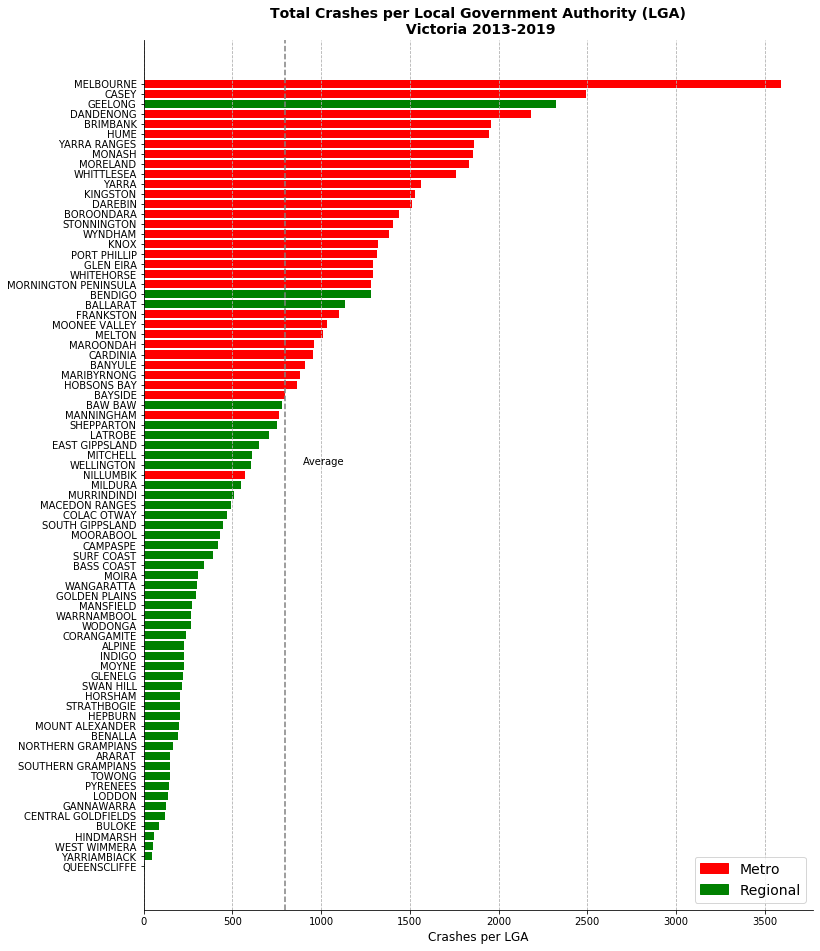

In [11]:
#Create a horizonal plot by LGA
plt.figure(figsize=(12,16))
colours = np.where(total_lga_plot["City_Regional"] == "Metro", "r", "g")
plt.barh(total_lga_plot["LGA"], total_lga_plot["total_crashes"], color=colours)

plt.title('Total Crashes per Local Government Authority (LGA)\n Victoria 2013-2019', fontsize=14, fontweight="bold")
plt.xlabel("Crashes per LGA", fontsize=12)

metro_patch_legend = mpatches.Patch(color="red", label="Metro")
regional_patch_legend = mpatches.Patch(color="green", label="Regional")
plt.legend(handles=[metro_patch_legend, regional_patch_legend], loc="lower right", fontsize=14)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axvline(x=797, label='Average', c="grey", linestyle="--")
plt.annotate('Average',(900,40))

plt.gca().xaxis.grid(True, linestyle='--')

plt.show()

## Explore crashes by LGA population for an overall persepective

In [13]:
#Calculate the correlation coefficient to see if there is a correlation between total population and the number of crashes
round(st.pearsonr(LGA_merged["Total_pop"], LGA_merged["total_crashes"])[0], 2)

0.89

In [14]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
summary_slope, summary_int, summary_r, summary_p, summary_std_err = stats.linregress(LGA_merged["Total_pop"], LGA_merged["total_crashes"])

In [15]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
pop_summary_fit = summary_slope * LGA_merged["Total_pop"] + summary_int

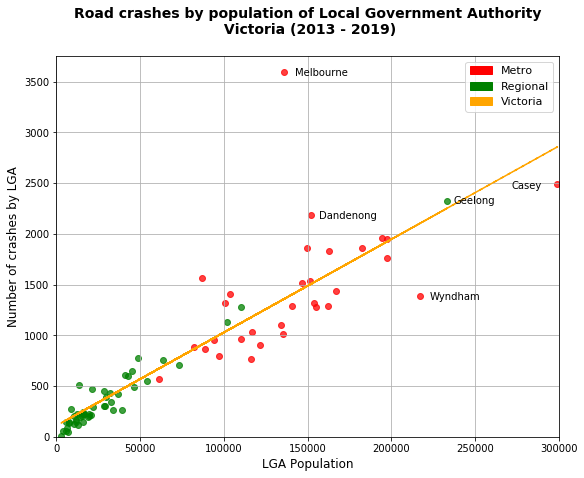

In [16]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Total_pop"], LGA_merged_metro["total_crashes"], facecolors=["red"], alpha = 0.75)
plt.scatter(LGA_merged_regional["Total_pop"], LGA_merged_regional["total_crashes"], facecolors=["green"], alpha = 0.75)
plt.plot(LGA_merged["Total_pop"], pop_summary_fit, "--", color="orange")

plt.xlabel("LGA Population", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by population of Local Government Authority\n Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_tp = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_tp = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_tp = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_tp, regional_patch_legend_tp, overall_patch_legend_tp], loc="upper right", fontsize=11)


plt.annotate('Melbourne',(142500,3560))
plt.annotate('Casey',(272000,2450))
plt.annotate('Wyndham',(223000,1350))
plt.annotate('Geelong',(237000,2300))
plt.annotate('Dandenong',(157000,2150))

plt.xlim(0,300000)
plt.ylim(0,3750)
plt.grid()
plt.show()

## Explore total crashes by LGA Index of Relative Socio-Economic Disadvantage (IRSD) - economic index

In [17]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])[0], 2)

0.25

In [18]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
IRSD_slope_m, IRSD_int_m, IRSD_r_m, IRSD_p_m, IRSD_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
IRSD_summary_fit_m = IRSD_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int_m

In [19]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (regional)
IRSD_slope_r, IRSD_int_r, IRSD_r_r, IRSD_p_r, IRSD_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (regional)
IRSD_summary_fit_r = IRSD_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int_r

In [20]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
IRSD_slope, IRSD_int, IRSD_r, IRSD_p, IRSD_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
IRSD_summary_fit = IRSD_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int

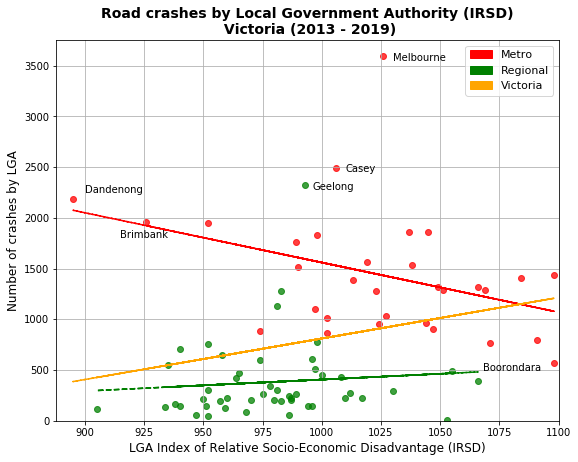

In [22]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["total_crashes"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["total_crashes"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit_r, "--", color="green")
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit, "--", color="orange")

plt.xlabel("LGA Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by Local Government Authority (IRSD)\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_IRSD = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_IRSD = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_IRSD = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_IRSD, regional_patch_legend_IRSD, overall_patch_legend_IRSD], loc="upper right", fontsize=11)


plt.annotate('Melbourne',(1030,3550))
plt.annotate('Dandenong',(900, 2250))
plt.annotate('Boorondara',(1068, 493))
plt.annotate('Brimbank',(915, 1800))
plt.annotate('Casey',(1010, 2450))
plt.annotate('Geelong',(996, 2277))

plt.xlim(888,1100)
plt.ylim(0,3750)
plt.grid()
plt.show()

## Explore total crashes by each LGA's median income (not used for presentation)

In [23]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Median household income"], LGA_merged["total_crashes"])[0], 2)

0.54

In [24]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
med_income_slope_m, med_income_int_m, med_income_r_m, med_income_p_m, med_income_std_err_m = stats.linregress(LGA_merged_metro["Median household income"], LGA_merged_metro["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
med_income_fit_m = med_income_slope_m * LGA_merged_metro["Median household income"] + med_income_int_m

In [25]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regioanl)
med_income_slope_r, med_income_int_r, med_income_r_r, med_income_p_r, med_income_std_err_r = stats.linregress(LGA_merged_regional["Median household income"], LGA_merged_regional["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
med_income_fit_r = med_income_slope_r * LGA_merged_regional["Median household income"] + med_income_int_r

In [26]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
med_income_slope, med_income_int, med_income_r, med_income_p, med_income_std_err = stats.linregress(LGA_merged["Median household income"], LGA_merged["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
med_income_fit = med_income_slope * LGA_merged["Median household income"] + med_income_int

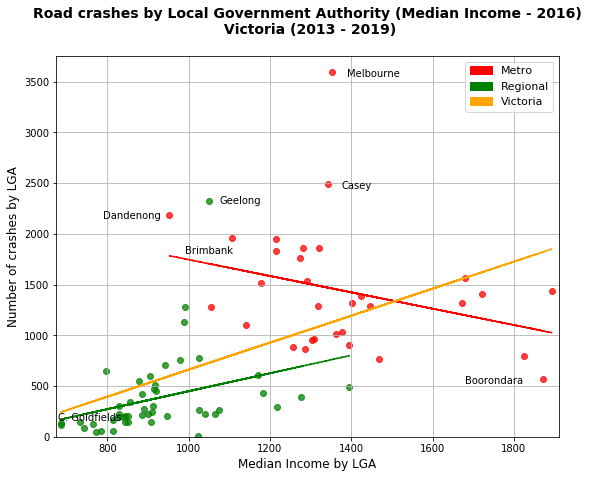

In [27]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Median household income"], LGA_merged_metro["total_crashes"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Median household income"], LGA_merged_regional["total_crashes"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged_metro["Median household income"], med_income_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Median household income"], med_income_fit_r, "--", color="green")
plt.plot(LGA_merged["Median household income"], med_income_fit, "--", color="orange")

plt.xlabel("Median Income by LGA", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by Local Government Authority (Median Income - 2016)\n Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_med = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_med = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_med = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_med, regional_patch_legend_med, overall_patch_legend_med], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1390,3550))
plt.annotate('Dandenong',(790, 2150))
plt.annotate('Boorondara',(1680, 525))
plt.annotate('Brimbank',(990, 1800))
plt.annotate('C. Goldfields',(680, 160))
plt.annotate('Casey',(1375, 2450))
plt.annotate('Geelong',(1075, 2300))

plt.xlim(675,1910)
plt.ylim(0,3750)
plt.grid()
plt.show()

## Number of alcohol incidents by socio economic status of LGA

In [29]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])[0], 2)

0.09

In [30]:
#Overall
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
booze_slope, booze_int, boze_r, booze_p, booze_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
booze_fit = booze_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int

In [31]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
booze_slope_m, booze_int_m, boze_r_m, booze_p_m, booze_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
booze_fit_m = booze_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int_m

In [32]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
booze_slope_r, booze_int_r, boze_r_r, booze_p_r, booze_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
booze_fit_r = booze_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int_r

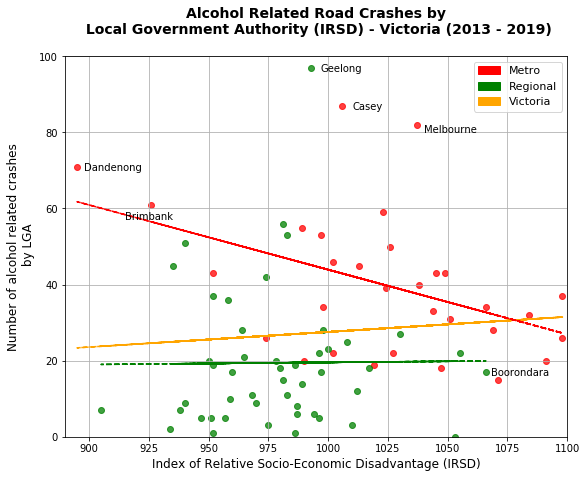

In [33]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["alcohol"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["alcohol"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit_r, "--", color="green")

plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of alcohol related crashes\n by LGA", fontsize=12)
plt.title("Alcohol Related Road Crashes by\n Local Government Authority (IRSD) - Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_booze = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_booze = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_booze = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_booze, regional_patch_legend_booze, overall_patch_legend_booze], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1040,80))
plt.annotate('Dandenong',(898, 70))
plt.annotate('Boorondara',(1068, 16))
plt.annotate('Brimbank',(915, 57))
plt.annotate('C. Goldfields',(878, 9))
plt.annotate('Casey',(1010, 86))
plt.annotate('Geelong',(997, 96))


plt.xlim(890,1100)
plt.ylim(0,100)
plt.grid()
plt.show()

## Number of alcohol incidents by people reporting to be of fair or poor health in each LGA (Not used for the presentation)

In [34]:
#Calculate the correlation coefficient to see if there is a correlation between the health in a LGA and the number of crashes
round(st.pearsonr(LGA_merged["People reporting fair or poor health status"], LGA_merged["total_crashes"])[0], 2)

0.26

In [35]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope, health_int, health_r, health_p, health_std_err = stats.linregress(LGA_merged["People reporting fair or poor health status"], LGA_merged["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit = health_slope * LGA_merged["People reporting fair or poor health status"] + health_int

In [36]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope_m, health_int_m, health_r_m, health_p_m, health_std_err_m = stats.linregress(LGA_merged_metro["People reporting fair or poor health status"], LGA_merged_metro["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit_m = health_slope_m * LGA_merged_metro["People reporting fair or poor health status"] + health_int_m

In [37]:
#REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope_r, health_int_r, health_r_r, health_p_r, health_std_err_r = stats.linregress(LGA_merged_regional["People reporting fair or poor health status"], LGA_merged_regional["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit_r = health_slope_r * LGA_merged_regional["People reporting fair or poor health status"] + health_int_r

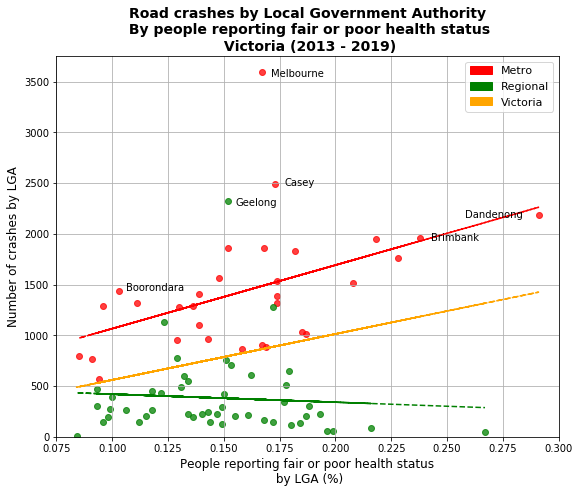

In [38]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["People reporting fair or poor health status"], LGA_merged_metro["total_crashes"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["People reporting fair or poor health status"], LGA_merged_regional["total_crashes"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["People reporting fair or poor health status"], health_fit, "--", color="orange")
plt.plot(LGA_merged_metro["People reporting fair or poor health status"], health_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["People reporting fair or poor health status"], health_fit_r, "--", color="green")

plt.xlabel("People reporting fair or poor health status\n by LGA (%)", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by Local Government Authority\n By people reporting fair or poor health status\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_health = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_health = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_health = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_health, regional_patch_legend_health, overall_patch_legend_health], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(0.171,3550))
plt.annotate('Dandenong',(.258, 2160))
plt.annotate('Boorondara',(0.106, 1440))
plt.annotate('Brimbank',(0.243, 1930))
plt.annotate('Casey',(0.177, 2470))
plt.annotate('Geelong',(0.155, 2280))

plt.xlim(0.075,.3)
plt.ylim(0,3750)
plt.grid()
plt.show()

## Represent the crashes per person in an LGA to see if there are more or less crashes per person (cpp) to socio factors¶

In [39]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["crash_per_person"])[0], 2)

-0.15

In [40]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
cpp_slope, cpp_int, cpp_r, cpp_p, cpp_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
cpp_fit = cpp_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int

In [41]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
cpp_slope_m, cpp_int_m, cpp_r_m, cpp_p_m, cpp_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
cpp_fit_m = cpp_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int_m

In [42]:
#REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
cpp_slope_r, cpp_int_r, cpp_r_r, cpp_p_r, cpp_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
cpp_fit_r = cpp_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int_r

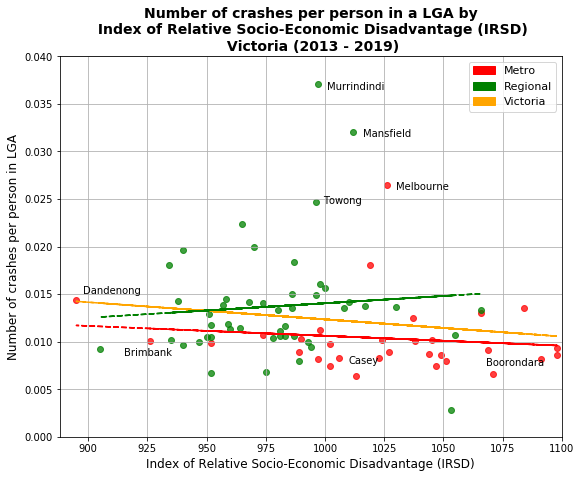

In [43]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["crash_per_person"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["crash_per_person"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit_r, "--", color="green")

plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of crashes per person in LGA", fontsize=12)
plt.title("Number of crashes per person in a LGA by\n Index of Relative Socio-Economic Disadvantage (IRSD)\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_cpp = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_cpp = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_cpp = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_cpp, regional_patch_legend_cpp, overall_patch_legend_cpp], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1030,0.026))
plt.annotate('Dandenong',(898, 0.015))
plt.annotate('Boorondara',(1068, 0.0075))
plt.annotate('Brimbank',(915, 0.0085))
plt.annotate('C. Goldfields',(876, .0077))
plt.annotate('Casey',(1010, 0.0077))
plt.annotate('Murrindindi',(1001, 0.0365))
plt.annotate('Mansfield',(1016, 0.0315))
plt.annotate('Towong',(999, 0.0245))

plt.xlim(888,1100)
plt.ylim(0,0.04)
plt.grid()
plt.show()

## Represent the crashes per person in an LGA to see if there are more or less crashes per person (cpp) for LGA alcohol factors

In [45]:
#Calculate the correlation coefficient to see if there is a correlation between alcohol related incidents
#and the number of crashes person (OVERALL)
round(st.pearsonr(LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged["crash_per_person"])[0], 2)

-0.14

In [46]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
cpp_alcohol_slope, cpp_alcohol_int, cpp_alcohol_r, cpp_alcohol_p, cpp_alcohol_std_err = stats.linregress(LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
cpp_alcohol_fit = cpp_alcohol_slope * LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"] + cpp_alcohol_int

In [47]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
cpp_alcohol_slope_m, cpp_alcohol_int_m, cpp_alcohol_r_m, cpp_alcohol_p_m, cpp_alcohol_std_err_m = stats.linregress(LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_metro["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
cpp_alcohol_fit_m = cpp_alcohol_slope_m * LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"] + cpp_alcohol_int_m

In [48]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
cpp_alcohol_slope_r, cpp_alcohol_int_r, cpp_alcohol_r_r, cpp_alcohol_p_r, cpp_alcohol_std_err_r = stats.linregress(LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_regional["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
cpp_alcohol_fit_r = cpp_alcohol_slope_r * LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"] + cpp_alcohol_int_r

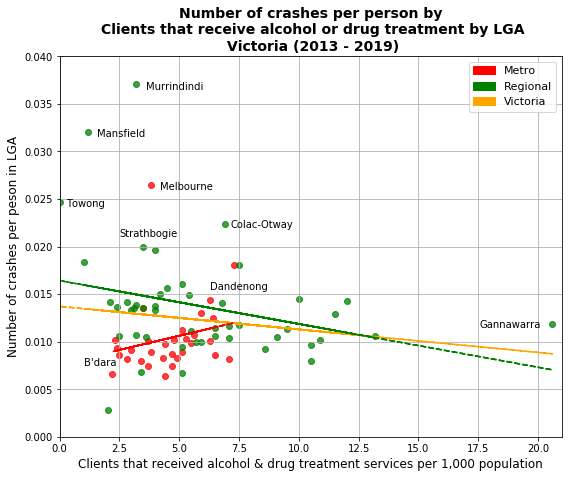

In [49]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_metro["crash_per_person"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_regional["crash_per_person"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], cpp_alcohol_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], cpp_alcohol_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], cpp_alcohol_fit_r, "--", color="green")

plt.xlabel("Clients that received alcohol & drug treatment services per 1,000 population", fontsize=12)
plt.ylabel("Number of crashes per peson in LGA", fontsize=12)
plt.title("Number of crashes per person by\n Clients that receive alcohol or drug treatment by LGA\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_cpp_alc = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_cpp_alc = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_cpp_alc = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_cpp_alc, regional_patch_legend_cpp_alc, overall_patch_legend_cpp_alc], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(4.2,0.026))
plt.annotate('Dandenong',(6.3, 0.0155))
plt.annotate("B'dara",(1, 0.0075))
plt.annotate('Mansfield',(1.55, 0.0315))
plt.annotate('Gannawarra',(17.55, 0.0115))
plt.annotate('Murrindindi',(3.6, 0.0365))
plt.annotate('Colac-Otway',(7.15, 0.022))
plt.annotate('Strathbogie',(2.5, 0.021))
plt.annotate('Towong',(0.249, 0.0242))


plt.xlim(0,21)
plt.ylim(0,0.04)
plt.grid()
plt.show()

## Work out overall statistics - by age and gender classifications (Young, Older, Middle Aged)

In [50]:
#Import the CSV holding condensed information for pie charting the summary statistics
grouped_city_or_regional = pd.read_csv("groupedregional.csv")
grouped_city_or_regional.head()

,total_crashes,total_inj,fatal,inj_male,inj_female,old_driver,young_driver,total_pop,inj_per_crash,male_%,female_%,older_%,young_%,percent_fatal,percent_crashes,percent_pop
0,44676,110512,547,60524,44069,2735,13680,4415403,2.473632,0.547669,0.398771,0.061219,0.306205,0.445803,0.708727,0.74608
1,18361,40022,680,22542,16010,1331,5303,1502734,2.179729,0.563240,0.400030,0.072491,0.288819,0.554197,0.291273,0.25392


Text(0.5, 1.0, '% of Accidents in Victoria\n Metro or Regional\n 2013-2019')

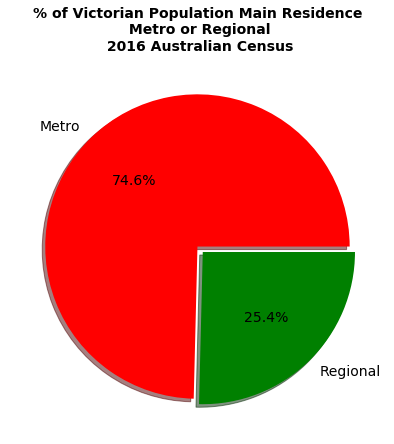

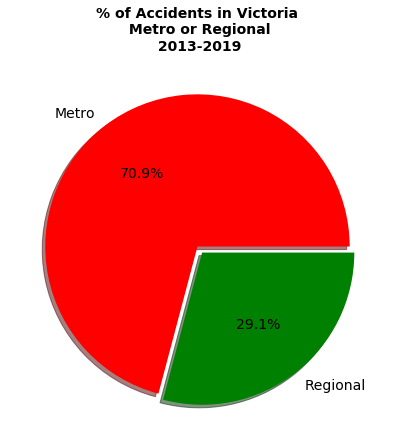

In [51]:
#Do a pie chart to show the % of Victorian accidents and where
#Setup the pie chart
colors = ["red", "green"]
labels = ["Metro", "Regional"]
explode = (0, 0.05)

#Plot the pie charts - population
plt.figure(figsize=(9,7))
plt.pie(grouped_city_or_regional["percent_pop"], colors=colors, autopct="%1.1f%%", shadow=True, labels=labels, explode=explode, textprops={'fontsize': 14})

plt.title("% of Victorian Population Main Residence\n Metro or Regional\n 2016 Australian Census", fontsize=14, fontweight="bold")

#Plot the pie charts - accidents
plt.figure(figsize=(9,7))
plt.pie(grouped_city_or_regional["percent_crashes"], colors=colors, autopct="%1.1f%%", shadow=True, labels=labels, explode=explode, textprops={'fontsize': 14})

plt.title("% of Accidents in Victoria\n Metro or Regional\n 2013-2019", fontsize=14, fontweight="bold")

